In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
df = pd.read_csv('C://Users//cool/Documents/data.csv')
df.drop('Unnamed: 0',axis = 1,inplace =True)

In [5]:
df.columns 

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [ ]:
df.drop_duplicates(inplace = True )

##  df.loc ,df.iloc and df.ix 

In [53]:
### Selceting using the loc commond d
# it's an expliciate selectiom (row or columns are specified and selection accordingly)

#df.loc[:2]
# selecting the multiple rows in the data frame using the df.loc commond
df.loc[10:15]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Ratio,Row_means
10,5.4,3.7,1.5,0.2,setosa,3.600000,2.880000
11,4.8,3.4,1.6,0.2,setosa,3.000000,2.600000
12,4.8,3.0,1.4,0.1,setosa,3.428571,2.545714
13,4.3,3.0,1.1,0.1,setosa,3.909091,2.481818
14,5.8,4.0,1.2,0.2,setosa,4.833333,3.206667
15,5.7,4.4,1.5,0.4,setosa,3.800000,3.160000


In [33]:
###  df.iloc commond for implicite selection of rows and columns (implicite means python index start from 0)

#  simple selection of data frame from  using iloc
df.iloc[1:3,2:5]

# comdotional selection of dataframe 
df.iloc[np.where(df['Species'] == 'setosa')]   

df.iloc[np.where(df['Sepal.Length']==4.9)]

   Petal.Length  Petal.Width Species
1           1.4          0.2  setosa
2           1.3          0.2  setosa


"\n# comdotional selection of dataframe \ndf.iloc[np.where(df['Species'] == 'setosa')]   \n\ndf.iloc[np.where(df['Sepal.Length']==4.9)]\n"

In [34]:
##  Seletion using the df.ix[]  ( hybride indexcing )

## when rows and columns index are on different  scale( numeric and integer )

df.ix[1:3,['Sepal.Length','Petal.Length']]

C:\Users\cool\Anaconda3\data\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,Sepal.Length,Petal.Length
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5


In [35]:
### Adding extra columan in pandas data frame 

df['Ratio'] =df['Sepal.Length']/df['Petal.Length']

In [37]:
df.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Ratio
0,5.1,3.5,1.4,0.2,setosa,3.642857
1,4.9,3.0,1.4,0.2,setosa,3.500000


In [41]:
### findig row means 

df['Row_means'] = df.mean(axis = 1)

In [49]:
## Adding the some extra column in the dataframe 

df1 =pd.DataFrame({'Sepal.Length':[1,2],'Sepal.Width':[3,5],'Petal.Length':[10,12],'Petal.Width':[15,20],'Species':['a','a']
               ,'Ratio':[12,15],'Row_means':[2,3]    })

In [51]:
df_concat = pd.concat([df,df1])

In [54]:
### ------ Conditonal Selection of pandas data frame  ------------###
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Ratio,Row_means
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.018051,3.175210
std,0.828066,0.435866,1.765298,0.762238,1.061621,0.458268
min,4.300000,2.000000,1.000000,0.100000,1.050000,2.372308
25%,5.100000,2.800000,1.600000,0.300000,1.230469,2.784286
50%,5.800000,3.000000,4.350000,1.300000,1.410603,3.150960
75%,6.400000,3.300000,5.100000,1.800000,3.176471,3.497409
max,7.900000,4.400000,6.900000,2.500000,4.833333,4.309851


In [61]:
cond_df =df[(df['Sepal.Length']<5.8433) & (df['Sepal.Width']>30.5733)] 

In [ ]:

### Null values 


df.dropna(thresh  =2)  #this method remove the col
df.fillna({},inplace =True)

In [66]:
df.mean(axis =0)

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
Ratio           2.018051
Row_means       3.175210
dtype: float64

In [67]:
#### ------------ Group by functions of an pandas data frame  ------------------###

df.groupby('Species').describe()

Petal.Length                                               \
                  count   mean       std  min  25%   50%    75%  max   
Species                                                                
setosa             50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           Petal.Width        ...  Sepal.Length      Sepal.Width         \
                 count   mean ...           75%  max       count   mean   
Species                       ...                                         
setosa            50.0  0.246 ...           5.2  5.8        50.0  3.428   
versicolor        50.0  1.326 ...           6.3  7.0        50.0  2.770   
virginica         50.0  2.026 ...           6.9  7.9        50.0  2.974   

                                                   
                 std  min    25%  50%    75%  max  
Species                                            
setosa      0.379064  2.3  3.200  3.4  3.675  4.4  
versicolor  0.313798  2.0  2.525  2.8  3.000  3.4  
virginica   0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 48 columns]

In [68]:
species_group = df.groupby('Species')

In [70]:
species_group.mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Ratio,Row_means
Species,,,,,,
setosa,5.006,3.428,1.462,0.246,3.464906,2.721381
versicolor,5.936,2.770,4.260,1.326,1.400896,3.138579
virginica,6.588,2.974,5.552,2.026,1.188350,3.665670


In [71]:
### ---- Groupo by commod on multiple columsn ###
a = ['Rahul','Santosh','Harish']
b = ['student','business','job']

#  Merging ,joing and concatening   data frame #

In [ ]:
pd.concate([df1,df2],axis = 0 )  #  concate the two data frame by row


In [ ]:
pd.merge(df1,df1,how = 'inner',on = 'key column name ')


In [ ]:
## Jion is same methos as merge but here we dont have key columsn So we join this by  data frame index 
left = pd.DataFrame()
rigth = pd.DataFrame()

left.join(rigth,how = 'inner')


# Ploting the  data in Seaborn 
It libray for ploting the statistical plot


### Distribution plot in seaborn 

In [81]:
# name of plot 
tips = sns.load_dataset('tips')    # its an inbulid data set in the seaborn library
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [82]:
tips.shape

(244, 7)

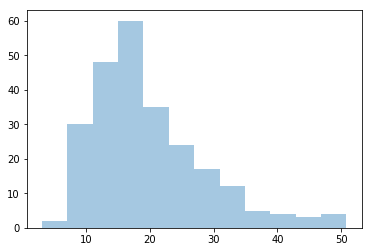

In [87]:
## Ploting the histograme 
sns.distplot(tips[['total_bill']],kde= False,bins= 12)

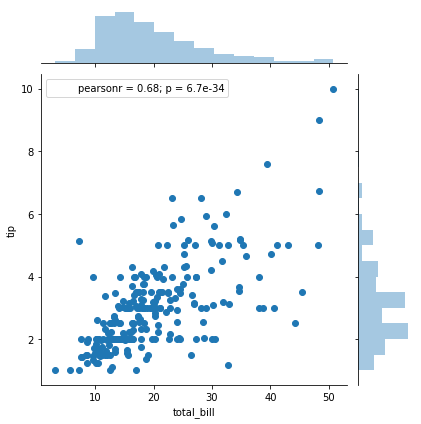

In [94]:
###  join plot of two varibale

sns.jointplot(x='total_bill',y='tip',data=tips )   ## Simple scatter plot of data 


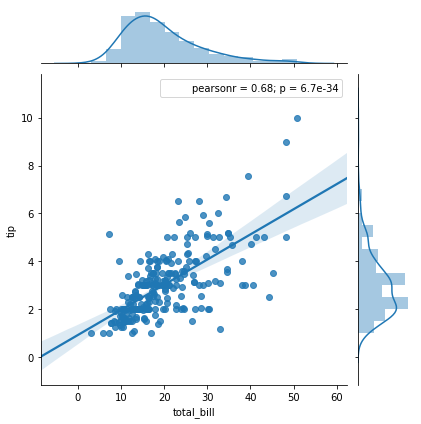

In [98]:
sns.jointplot(x='total_bill',y='tip',data=tips ,kind ='reg')  ## fits the regression line on the scatter plot

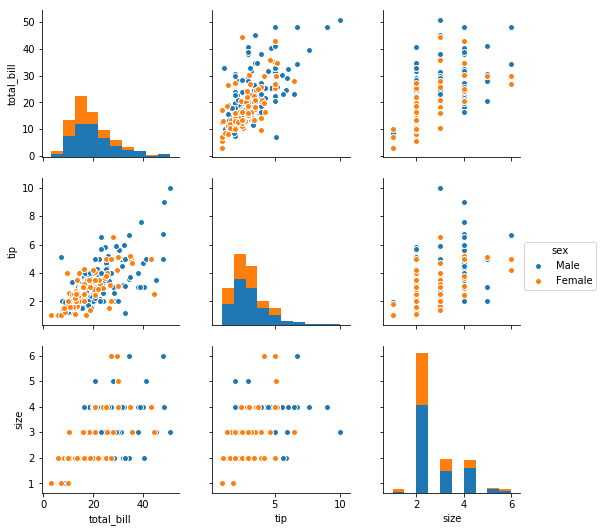

In [99]:
### pairplot in the data frame
## this plot the scatter plot for the all possible combinations of numeric values variabls

sns.pairplot(tips,hue='sex')

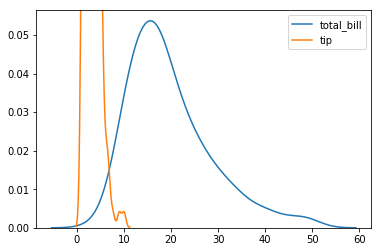

In [101]:
### Distribution plot of continues random variabel 

sns.kdeplot(tips['total_bill'])
sns.kdeplot(tips['tip'])

### Categorical Plot ####

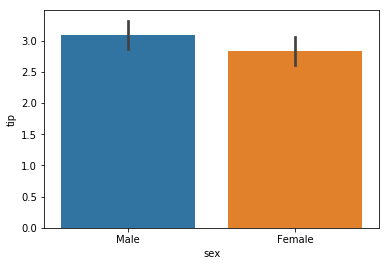

In [102]:
## bar plot of data 

sns.barplot(x='sex',y='tip',data=tips, estimator=np.mean )

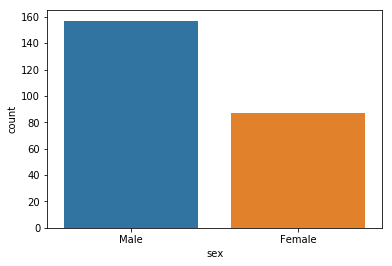

In [105]:
## count plot 
sns.countplot(x='sex',data = tips)

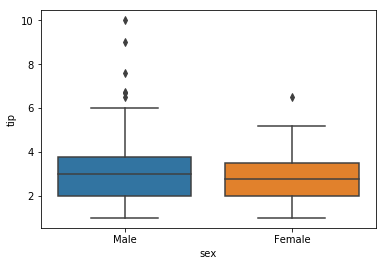

In [106]:
## bokxplot 
sns.boxplot(x='sex',y='tip',data=tips)

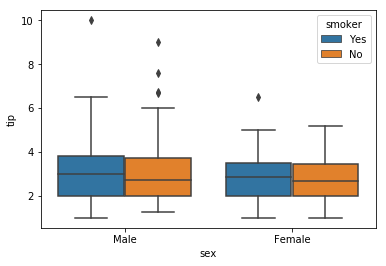

In [110]:
sns.boxplot(x='sex',y='tip',data=tips,hue='smoker')

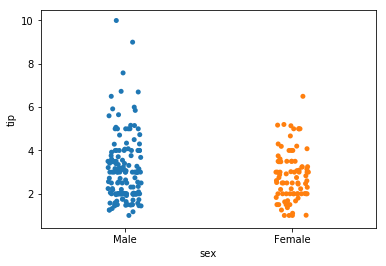

In [112]:
### strippot ( for one catgoraicla varable and one numeric variabel )

sns.stripplot(x='sex',y='tip',data=tips,jitter=True)

## Matrix plot 

In [113]:
flights = sns.load_dataset('flights')

In [114]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [116]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


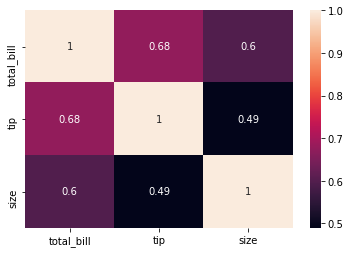

In [119]:
sns.heatmap(tips.corr(),annot=True)

In [121]:
flights.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [122]:
p_table = flights.pivot_table(index = 'month',columns= 'year',values = 'passengers')

In [123]:
p_table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


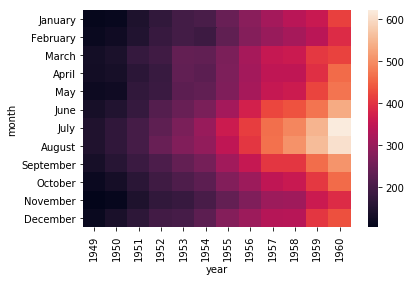

In [127]:
sns.heatmap(p_table,annot =False)

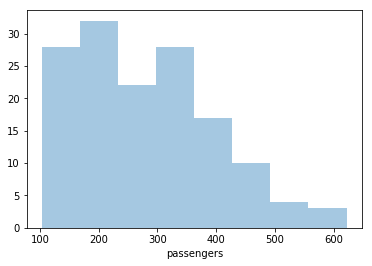

In [129]:
sns.distplot(flights['passengers'],kde =False)

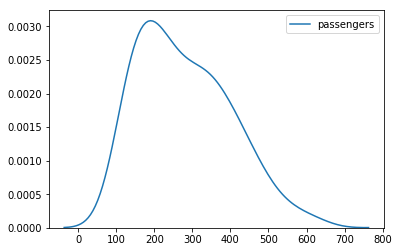

In [130]:
sns.kdeplot(flights['passengers'])

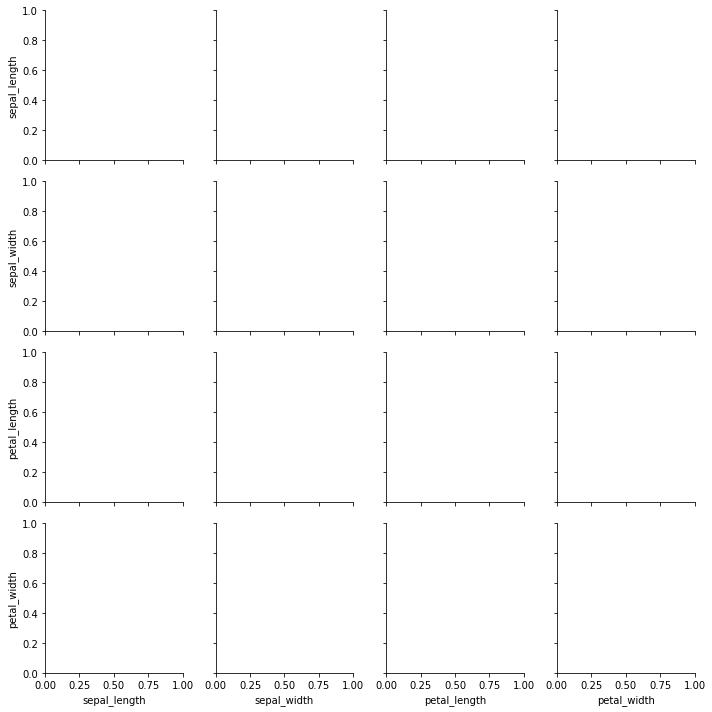

In [132]:
### Girds 
iris = sns.load_dataset('iris')
sns.PairGrid(iris)

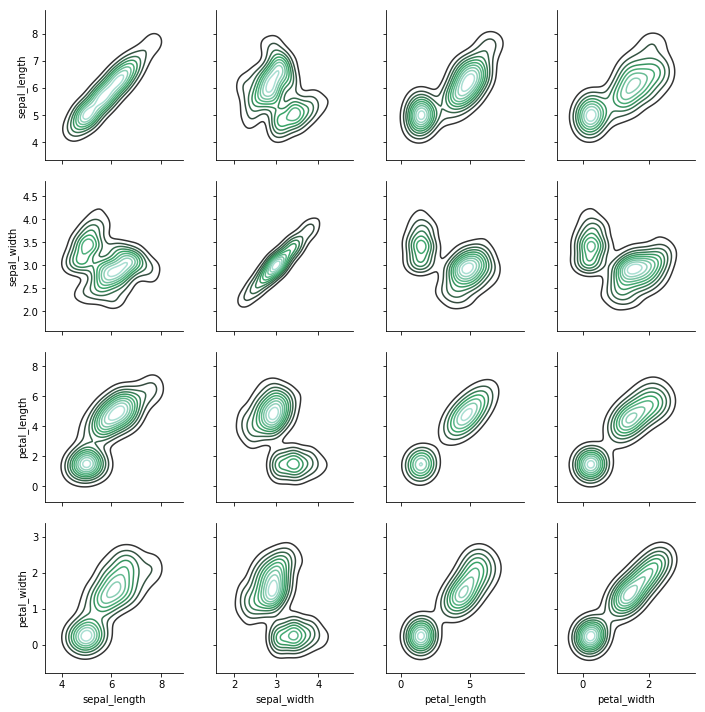

In [136]:
g=sns.PairGrid(iris)
g.map(sns.kdeplot)

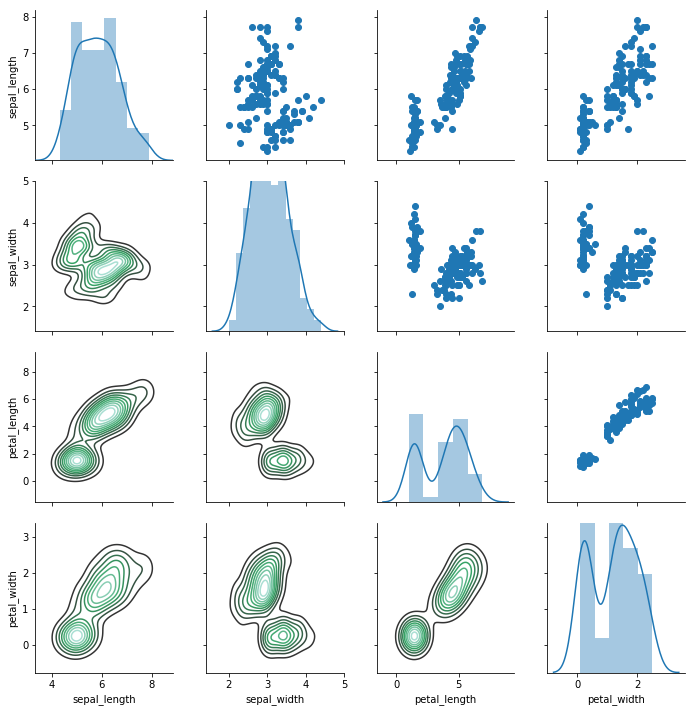

In [139]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)

## Regression  plot ##


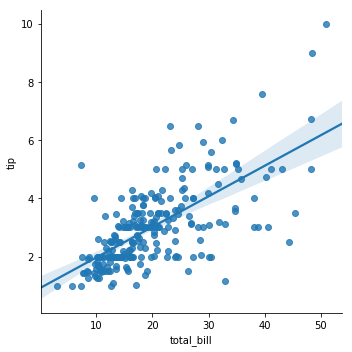

In [141]:
sns.lmplot(x='total_bill',y='tip',data =tips)

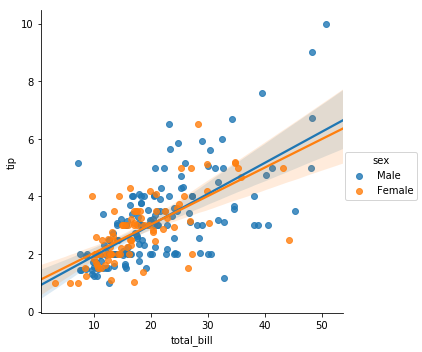

In [142]:
sns.lmplot(x='total_bill',y='tip',data = tips,hue ='sex')

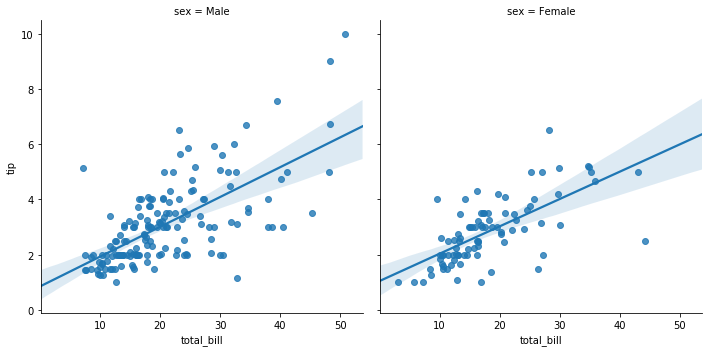

In [143]:
sns.lmplot(x ='total_bill',y='tip',data =tips,col = 'sex')

## Model Building in Sklearn


### Superwise modes in Sklearn 

#### Genral Structure of sklearn model  
1. we have to import the modle from the praticular fimily of models
eg.  In genaral  :from sklearn.family import model
     Specific code : from sklearn.linear_model import LinearRegression
     
2. Train test split of data 
   from sklearn.cross_validation import train_test_split
   X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3) 
    
3. model = LinearRegression(normlize=True )     
4. model.fit(X_train,y_train)
5. mddel.predict(X_test)
6. model.predict_proba(X_test)    # In the classification models gives the probability  probability of class labels


In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [178]:
df = tips[['total_bill','tip']]

In [179]:
X= df['total_bill']
y =df['tip']
X_trian,X_test,y_trian,y_test = train_test_split(X,y,test_size =0.3,random_state=10)

In [192]:
X_trian = pd.DataFrame(X_trian)
y_trian = pd.DataFrame(y_train)

In [190]:
## Linear model fittion in the data 
reg_model = LinearRegression()
reg_model.fit(X_trian,y_trian)
estimtes = reg_model.predict(pd.DataFrame(X_test))

coeff = pd.Series({'coef' :reg_model.coef_,'intercept':reg_model.intercept_})



In [191]:
coeff

coef         [[0.00731376702887]]
intercept         [2.84668666089]
dtype: object

### Some Common model and their class 

1) Logistic Regression model
    form sklearn.linear_model import LogisticRegression
2) Decision tree 
     from sklearn.tree import  DecisionTreeClassifier
3) Random Forest
     from sklearn.ensemble import RandomForestClassifier
4) AdaBoosClassifier 
     from sklearn.ensemble import AdaBoostClassifier  
5) Support Vector machine
      from sklearn.svm import SVC
      



## Mthod for evalution of classifier 

Fro computing the classification report and other confusion mmatrix 

1) from sklearn.metrics import classification_report
   print(classification_report(y_test,predicated_values of Y))
2) from sklearn.matrics import confusion_matrix
      comfusio_matrix(y_test,y_predict)
      
 


## Unsuperwise learning with Sklearn

## Principale Component analysis with Python

In [207]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [202]:
iris = iris.drop('species',axis = 1)

In [206]:
scaler = StandardScaler()
scaler.fit(iris)
scaled_data = scaler.transform(iris)

In [208]:
###  Computin principal component of data
pca = PCA(n_components=2)





In [210]:
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [225]:
x_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [226]:
pca_df

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
5,-2.075631,1.489178
6,-2.444029,0.047644
7,-2.232847,0.223148
8,-2.334640,-1.115328
9,-2.184328,-0.469014


In [222]:
pca_df = pd.DataFrame(x_pca)
pca_df.columns

RangeIndex(start=0, stop=2, step=1)

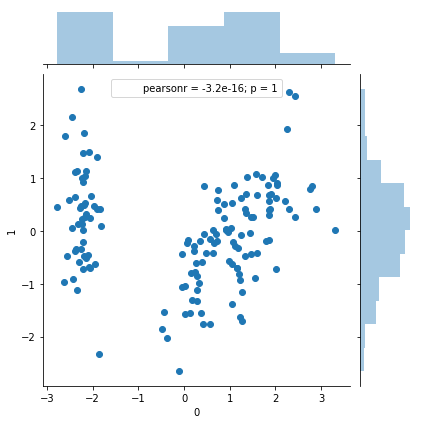

In [224]:
sns.jointplot(x=pca_df.iloc[:,0],y=pca_df.iloc[:,1],data = pca_df)

## Defining function in Python 

In [1]:
def square(x):
    return(x**2)

In [2]:
square(10)

100